<a href="https://colab.research.google.com/github/vadimoz1032/LR-MLDL/blob/main/%D0%9B%D0%A0_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовили студенты ИУ10-91, Грабчук Д.С., Конюхов М.В., Розанов В.В.

Датасет: \
Набор данных для анализа и прогноза сердечного приступа. Цель модели -  
  0 = меньше вероятность сердечного приступа у пациента \
  1 = больше вероятность сердечного приступа у пациента

Импортируем все необходимые библиотеки Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Считываем данные из файла и выведем их в виде таблицы

In [ ]:
data = pd.read_csv('/content/heart.csv')

data.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Сделаем вывод информации о данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Выведем информацию об имеющихся данных

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Проверим нулевые поля данных

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Удаляем высококоррелированные признаки, используя тепловую карту

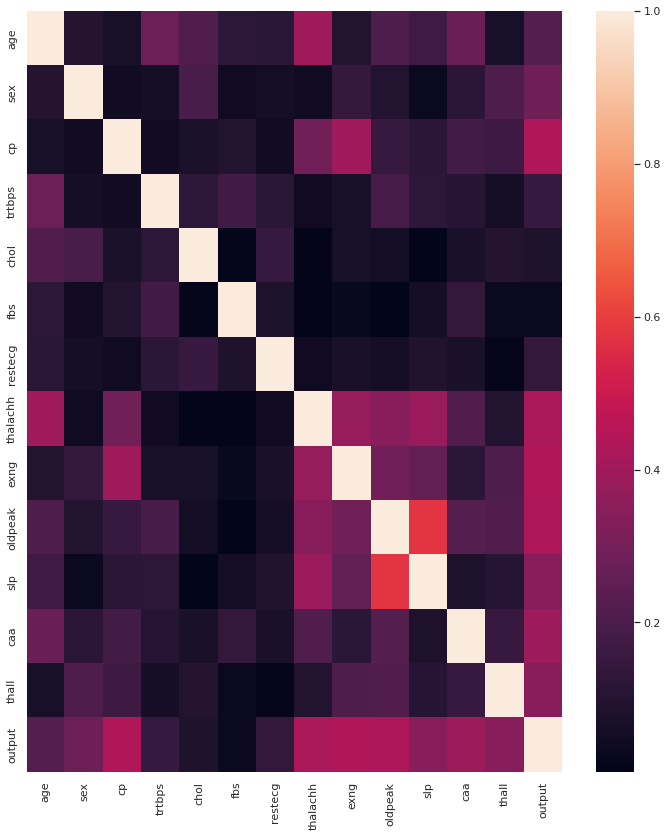

In [ ]:
import seaborn as sns

corr = data.corr().abs()

sns.set(rc={'figure.figsize': (12, 14)})

sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [ ]:
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,0.098447,0.068653,0.279351,0.213678,0.121308,0.116211,0.398522,0.096801,0.210013,0.168814,0.276326,0.068001,0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,0.045032,0.058196,0.044020,0.141664,0.096093,0.030711,0.118261,0.210041,0.280937
cp,0.068653,0.049353,1.000000,0.047608,0.076904,0.094444,0.044421,0.295762,0.394280,0.149230,0.119717,0.181053,0.161736,0.433798
trtbps,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,0.114103,0.046698,0.067616,0.193216,0.121475,0.101389,0.062210,0.144931
chol,0.213678,0.197912,0.076904,0.123174,1.000000,0.013294,0.151040,0.009940,0.067023,0.053952,0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,0.084189,0.008567,0.025665,0.005747,0.059894,0.137979,0.032019,0.028046
restecg,0.116211,0.058196,0.044421,0.114103,0.151040,0.084189,1.000000,0.044123,0.070733,0.058770,0.093045,0.072042,0.011981,0.137230
thalachh,0.398522,0.044020,0.295762,0.046698,0.009940,0.008567,0.044123,1.000000,0.378812,0.344187,0.386784,0.213177,0.096439,0.421741
exng,0.096801,0.141664,0.394280,0.067616,0.067023,0.025665,0.070733,0.378812,1.000000,0.288223,0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,0.149230,0.193216,0.053952,0.005747,0.058770,0.344187,0.288223,1.000000,0.577537,0.222682,0.210244,0.430696


Посчитаем количество значений для целевого признака

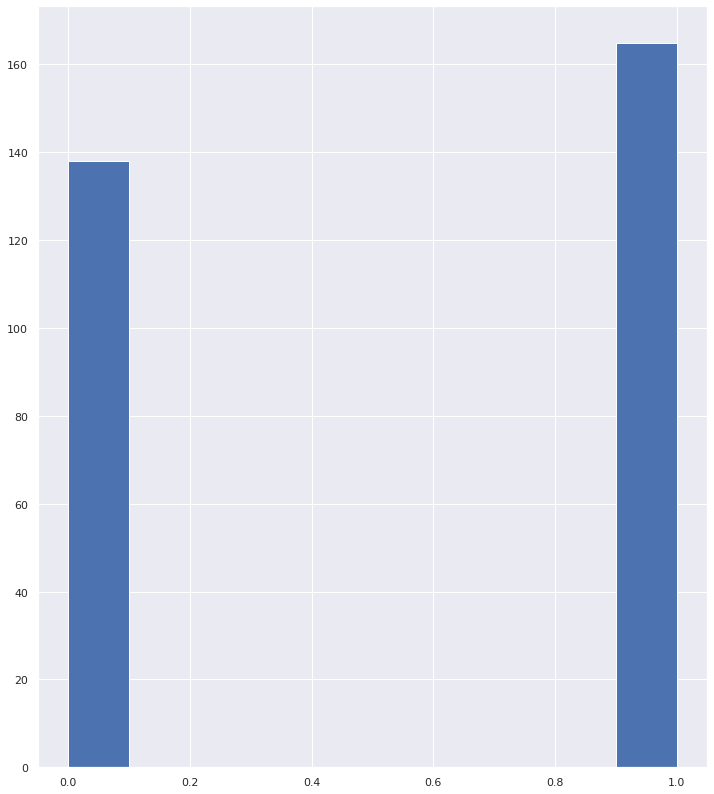

In [ ]:
data.output.hist()

Попробуем выявить аномальные признаки, используя диаграмму

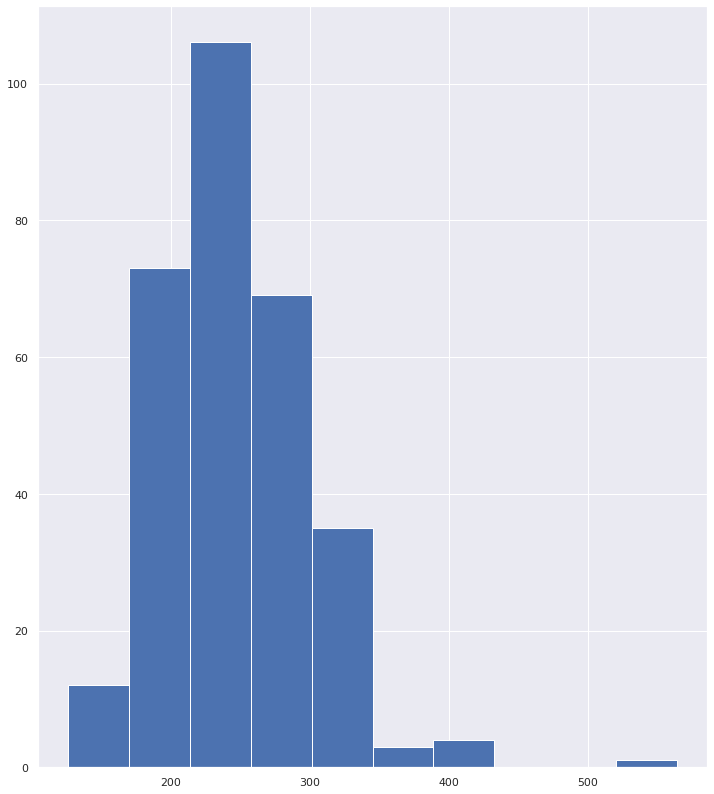

In [ ]:
data['chol'].hist()

Разделим данные на целевые и нецелевые признаки. В нашем случае целевым признаком является output - вероятность сердечного приступа

Поделим наши данные по принципу отложенной выборки

In [ ]:
X = data[data.columns[:-1]]
y = data['output']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

Создадим и обучим классификатор

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.5981308411214953